In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
startup = pd.read_csv('C:\\Nikhil\\DS\\ML\\Assignments\\Multi linear regression\\50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
startup.rename(columns = {'R&D Spend' : 'RAD', 'Marketing Spend' : 'MKT', 'Administration' : 'ADMIN'}, inplace = True)
startup.head()

,RAD,ADMIN,MKT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


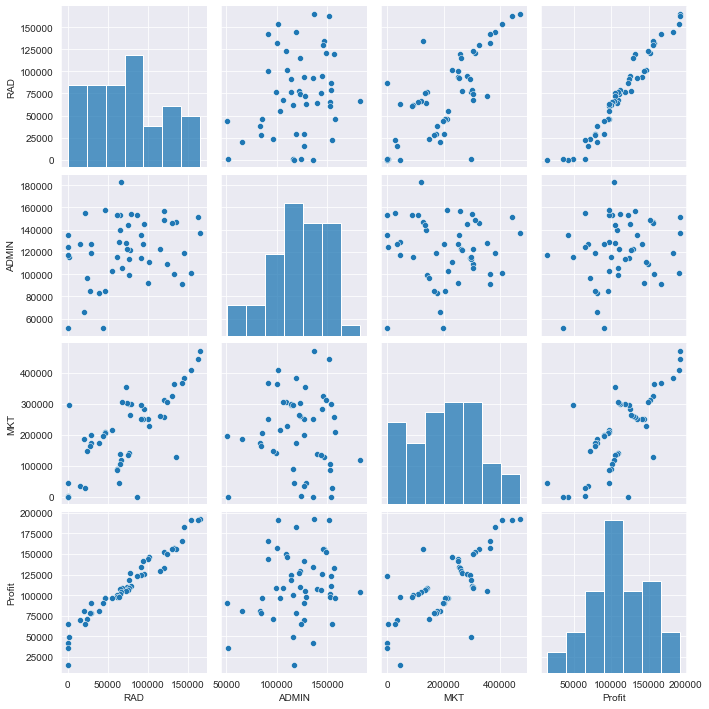

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup)

# Bulding a Model

In [8]:
model = smf.ols('Profit ~ RAD + ADMIN + MKT',data=startup).fit()

In [9]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RAD              0.805715
ADMIN           -0.026816
MKT              0.027228
dtype: float64

In [10]:
# Finding tvalues and pvalues
print(model.tvalues)
print(model.pvalues)

Intercept     7.626218
RAD          17.846374
ADMIN        -0.525507
MKT           1.655077
dtype: float64
Intercept    1.057379e-09
RAD          2.634968e-22
ADMIN        6.017551e-01
MKT          1.047168e-01
dtype: float64


In [11]:
# Finding rsquared value
model.rsquared

0.9507459940683246

## Calculating VIF

In [12]:
rsq_rad = smf.ols('RAD ~ ADMIN + MKT',data=startup).fit().rsquared
vif_rad = 1/(1-rsq_rad)

rsq_mkt = smf.ols('MKT ~ RAD + ADMIN ',data=startup).fit().rsquared  
vif_mkt = 1/(1-rsq_mkt) 

rsq_admin = smf.ols('ADMIN ~ RAD + MKT',data=startup).fit().rsquared  
vif_admin = 1/(1-rsq_mkt) 

# Storing vif values in a data frame
d1 = {'Variables':['RAD','MKT','ADMIN'],'VIF':[vif_rad,vif_mkt,vif_admin]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RAD,2.468903
1,MKT,2.326773
2,ADMIN,2.326773


# Residual Analysis

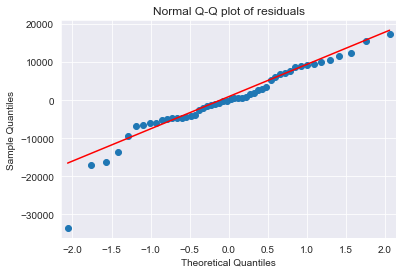

In [13]:
model = smf.ols('Profit ~ RAD + ADMIN + MKT',data=startup).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [14]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

## Improving the model

In [15]:
startup_1=startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
startup_1.head()

,RAD,ADMIN,MKT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Cook’s Distance

In [16]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

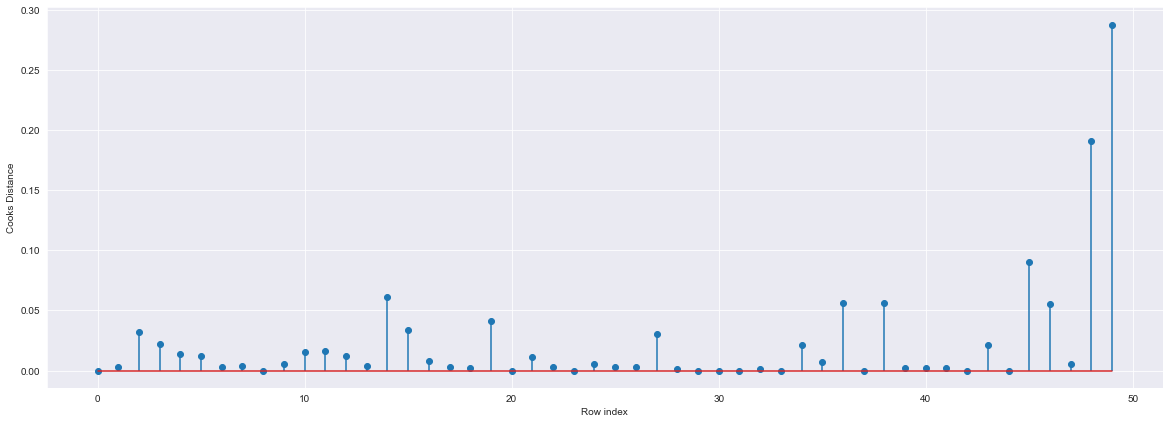

In [17]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## High Influence points

In [18]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

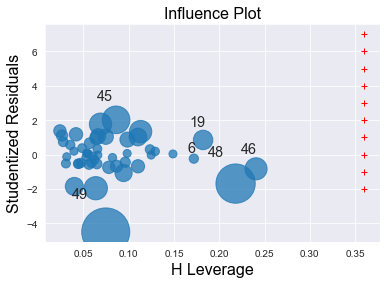

In [19]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

# Now building a new model

In [20]:
model1 = smf.ols('Profit ~ RAD + ADMIN + MKT',data=startup_1).fit()

In [21]:
# Finding Coefficient parameters for filtered data
model1.params

Intercept    52382.439251
RAD              0.783002
ADMIN           -0.022201
MKT              0.025234
dtype: float64

In [22]:
# Finding tvalues and pvalues for new datapoints
print(model1.tvalues)
print(model1.pvalues)

Intercept     9.450782
RAD          20.469501
ADMIN        -0.517889
MKT           1.825383
dtype: float64
Intercept    2.960000e-12
RAD          1.971077e-24
ADMIN        6.070728e-01
MKT          7.458443e-02
dtype: float64


In [23]:
# Finding rsquared value for improved model
model1.rsquared

0.9613162435129847

In [24]:
# So here we get 96.13% accuracy in this model

## Table containing R^2 value for each prepared model

In [25]:
d2={'Prepared_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,model1.rsquared]}
table=pd.DataFrame(d2)
table

,Prepared_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
